In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys; sys.path.insert(0, os.path.abspath('../'))
import btom as bt
import scipy.stats as st
import ternary

In [63]:
aa = bt.utils.StanModelFactory.load_builtin('test-prior4.stan').model
bb = bt.utils.StanModelFactory.load_builtin('test-prior5.stan').model
gm = bt.utils.StanModelFactory.load_builtin('ginibre-prior.stan').model
#tm = bt.utils.StanModelFactory.load_builtin('test-prior.stan').model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0ff47137c83fcfa905d8a54f47566094 NOW.


/home/ihincks/.miniconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


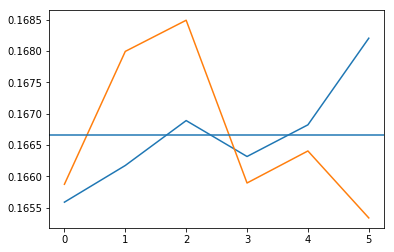

In [64]:
fit = bb.sampling({'D':6,'s':0.5,'K':7,'t':-2})
fit2 = gm.sampling({'D':6,'s':0.5,'K':6,'t':-2})

plt.plot(np.real(np.mean(fit['rho_real'] + 1j*fit['rho_imag'],axis=0)[np.diag_indices(fit.data['D'])]))
plt.plot(np.real(np.mean(fit2['rho_real'] + 1j*fit2['rho_imag'],axis=0)[np.diag_indices(fit.data['D'])]))
plt.axhline(1/fit.data['D'])

In [8]:
from scipy.special import logit, expit

In [61]:
logit(1/np.sqrt(np.arange(2,30)))

array([ 0.88137359,  0.31190536,  0.        , -0.21193536, -0.37121159,
       -0.498197  , -0.6034561 , -0.69314718, -0.77116214, -0.84011129,
       -0.90182728, -0.95764427, -1.00856262, -1.05535098, -1.09861229,
       -1.1388279 , -1.17638802, -1.21161322, -1.24476995, -1.27608201,
       -1.30573912, -1.3339035 , -1.36071485, -1.38629436, -1.4107478 ,
       -1.43416802, -1.45663693, -1.47822721])

In [11]:
1 / np.sqrt(6 - np.arange(1,6)+1)

array([0.40824829, 0.4472136 , 0.5       , 0.57735027, 0.70710678])

In [26]:
1/np.sqrt(7 - np.arange(1,8)+1)

array([0.37796447, 0.40824829, 0.4472136 , 0.5       , 0.57735027,
       0.70710678, 1.        ])

In [69]:
np.mean(fit['y'],axis=0)

array([ 3.99891215e-01,  3.64540788e-01,  3.22839335e-01,  2.77765331e-01,
        2.21926817e-01,  1.49340841e-01, -9.71332129e-04,  8.90185278e-04,
        6.96820832e-04,  7.09756938e-04, -6.71847617e-04,  7.91383812e-04,
        1.80305064e-03,  3.65648591e-03,  1.90119158e-03, -1.01761712e-03,
       -1.30809883e-03,  1.04248237e-03, -9.14530657e-05, -3.00951918e-03,
       -2.71405718e-04,  1.02338428e-03, -1.56014016e-03, -1.15202663e-03,
       -1.23418326e-04, -1.99691539e-04,  4.08264767e-04,  4.98809235e-04,
       -1.12735187e-03, -1.50554002e-03,  1.46491762e-03, -1.62408254e-04,
        1.33378957e-03, -1.79014190e-03,  2.56630386e-04,  1.47304849e-04])

In [68]:
np.mean(expit(fit['X_diag_unc']), axis=0)

array([0.36454079, 0.34816583, 0.32090379, 0.27188173, 0.19137414])

In [56]:
1/6

0.16666666666666666

In [59]:
np.mean(x[:,0]**2)

0.1397307333383012

In [70]:
x = expit(fit['X_diag_unc'])
cs = np.concatenate([np.ones((4000,1)), np.sqrt(1 - np.cumsum(x**2, axis=1))], axis=1)
np.mean(cs[:,:-1] * x, axis=0)

/home/ihincks/.miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


array([0.36454079, 0.32283934, 0.27430999, 0.21391799, 0.13956376])

In [27]:
np.mean(expit(fit['X_diag_unc']), axis=0)

array([0.13830785, 0.12916516, 0.11144558, 0.08274742, 0.04551696])

In [62]:
np.mean(fit['rho_real'][(np.s_[:],) + np.diag_indices(6)], axis=0)

array([0.16980605, 0.16789159, 0.16629958, 0.16569059, 0.16411507,
       0.16619712])

In [17]:
fit

Inference for Stan model: anon_model_c2473cb670d748151bb0e4e85bf3d65b.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
X_diag_unc[0]      -0.58  5.5e-3   0.35  -1.29   -0.8  -0.57  -0.34   0.09   4000    1.0
X_diag_unc[1]      -0.64  6.0e-3   0.38  -1.43  -0.89  -0.63  -0.38   0.07   4000    1.0
X_diag_unc[2]      -0.78  6.9e-3   0.43  -1.71  -1.06  -0.76  -0.48-3.5e-3   4000    1.0
X_diag_unc[3]      -1.04  8.1e-3   0.52  -2.15  -1.36   -1.0  -0.69  -0.15   4000    1.0
X_diag_unc[4]      -1.61    0.01   0.76   -3.4  -2.01  -1.51   -1.1  -0.37   4000    1.0
X_offdiag_unc[0]  2.5e-3  2.5e-3   0.16  -0.31   -0.1 3.5e-3   0.11    0.3   4000    1.0
X_offdiag_unc[1] -9.1e-4  2.6e-3   0.16  -0.33  -0.11-3.1e-3   0.11   0.32   4000    1.0
X_offdiag_unc[2] -1.4e-3  2.5e-3   0.16  -0.32  -0.11-9.8e-4    0.1   0.31   4000    1.0
X_offdiag_

In [9]:
def scramble(a, axis=-1):
    """
    Return an array with the values of `a` independently shuffled along the
    given axis
    """
    b = np.random.random(a.shape)
    idx = np.argsort(b, axis=axis)
    shuffled = a[np.arange(a.shape[0])[:, None], idx]
    return shuffled

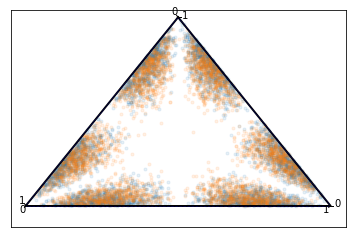

In [13]:
fig, tax = ternary.figure(scale=1)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")

fit = gm.sampling({'D':3,'K':3})
rho = fit['rho_real'] + 1j * fit['rho_imag']
svds = np.linalg.svd(rho, compute_uv=False)
tax.scatter(scramble(svds,axis=1), alpha=0.1, marker='.')

fit = aa.sampling({'D':3,'s':2*(3-3)+1})
rho = fit['rho_real'] + 1j * fit['rho_imag']
svds = np.linalg.svd(rho, compute_uv=False)
tax.scatter(scramble(svds,axis=1), alpha=0.1, marker='.')

tax.ticks(axis='lbr', linewidth=1)
tax.clear_matplotlib_ticks()

/home/ihincks/.miniconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


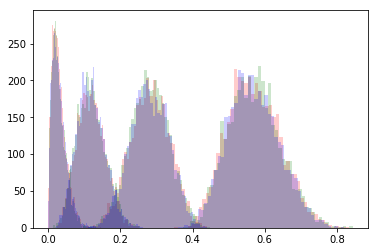

In [38]:
def plot_svd(model, D, K, s=1, c='r'):
    ff = model.sampling({'D':D,'K':K, 's':s})
    basis = bt.gell_mann_basis([D])[1:]
    x = np.real(basis.expand(ff['rho_real']+1j*ff['rho_imag'])).T
    x = np.linalg.svd(ff['rho_real']+1j*ff['rho_imag'], compute_uv=False).T
    for xx in x:
        plt.hist(xx, 50, alpha=0.2, facecolor=c)

plot_svd(aa, 4,3,s=(5-4)+0.5)
plot_svd(bb, 4,3,s=(5-4)+0.5,c='g')
plot_svd(gm, 4,5, c='b')

In [52]:
gm = bt.utils.StanModelFactory.load_builtin('ginibre-prior.stan').model
tm = bt.utils.StanModelFactory.load_builtin('test-prior.stan').model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b85769e378881c4f8ddbf8a7d42bfb52 NOW.


In [17]:
from scipy.special import logit, expit

In [ ]:
np.sqrt()

In [19]:
expit(1.09)

0.7483817216070642

In [64]:
data = {'D': 5, 'K':2}
gf = gm.sampling(data)
tf = tm.sampling(data)

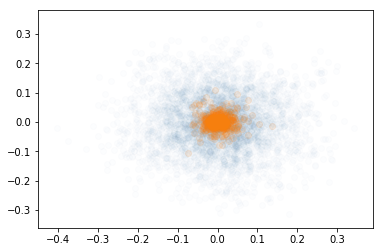

In [65]:
basis = bt.gell_mann_basis([data['D']])[1:]
x = np.real(basis.expand(gf['rho_real'] + 1j * gf['rho_imag'])).T
y = np.real(basis.expand(tf['rho_real'] + 1j * tf['rho_imag'])).T
plt.scatter(x[:,0], x[:,1], alpha=0.01)
plt.scatter(y[:,0], y[:,1], alpha=0.1)

In [66]:
tf['X_real'][0,...]

array([[ 0.02939918,  0.        ],
       [-0.59542684,  0.69885666],
       [-0.34267604, -0.13174695],
       [ 0.1263147 ,  0.0029276 ],
       [ 0.00258917, -0.06019876]])

In [67]:
tf['X_imag'][0,...]

array([[ 0.        ,  0.        ],
       [-0.01286646,  0.        ],
       [ 0.01879705,  0.00402152],
       [-0.03367464,  0.00438868],
       [-0.00484393, -0.01055861]])

In [68]:
tf['X_vec'][0,...]

array([ 0.02939918,  0.69885666, -0.59542684, -0.34267604, -0.13174695,
        0.1263147 ,  0.0029276 ,  0.00258917, -0.06019876, -0.01286646,
        0.01879705,  0.00402152, -0.03367464,  0.00438868, -0.00484393,
       -0.01055861])

In [69]:
tf

Inference for Stan model: anon_model_b85769e378881c4f8ddbf8a7d42bfb52.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
X_vec_diag[0]    -1.6e-3    0.02   1.05  -2.07   -0.7-6.5e-3   0.68    2.1   4000    1.0
X_vec_offdiag[0]    0.02    0.02    1.0  -1.94  -0.66   0.03   0.71    1.9   4000    1.0
X_vec_offdiag[1] -2.5e-3    0.02   0.96  -1.89  -0.64  -0.01   0.64   1.89   4000    1.0
X_vec_offdiag[2] -5.0e-3    0.02   0.96  -1.98  -0.64 6.1e-3   0.64   1.93   4000    1.0
X_vec_offdiag[3]    0.02    0.02   0.99  -1.94  -0.65   0.03   0.68   1.98   4000    1.0
X_vec_offdiag[4] -6.4e-3    0.02   0.96  -1.87  -0.66-4.6e-3   0.64   1.88   4000    1.0
X_vec_offdiag[5]  3.2e-3    0.02   0.99  -1.94  -0.66 7.1e-3   0.67   1.91   4000    1.0
X_vec_offdiag[6]    0.01    0.02   1.01  -1.97  -0.65 2.7e-3   0.69   2.02   4000    1.0
X_vec_offd